# Пример использования нейросетевого регрессора MLPRegressor

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=4, noise=1, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
model = MLPRegressor(hidden_layer_sizes=(20), max_iter=1, warm_start=True, random_state=42)
num_iterations = 1500
train_losses = []
test_losses = []

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Final Test MSE: 6.9825


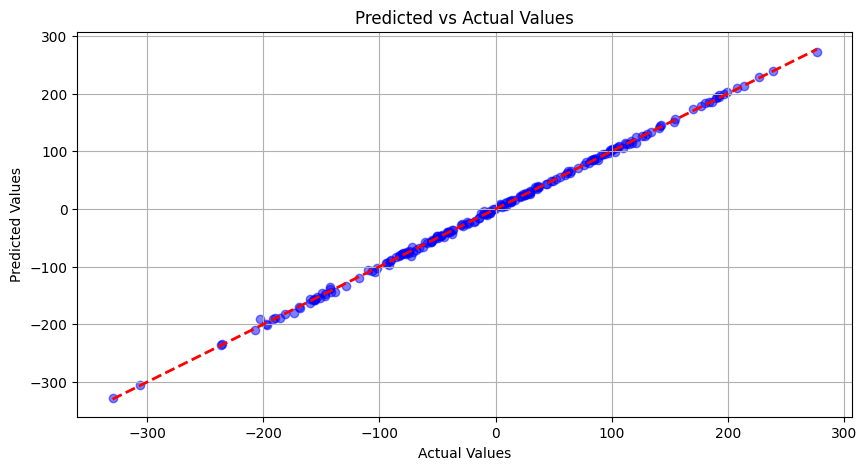

In [6]:
for _ in range(num_iterations):
    model.fit(X_train, y_train)  # Continues from previous weights due to warm_start=True
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_loss = mean_squared_error(y_train, train_pred)
    test_loss = mean_squared_error(y_test, test_pred)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

y_pred = model.predict(X_test)

# Calculate final mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Final Test MSE: {mse:.4f}")



# Visualization: Prediction Error Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

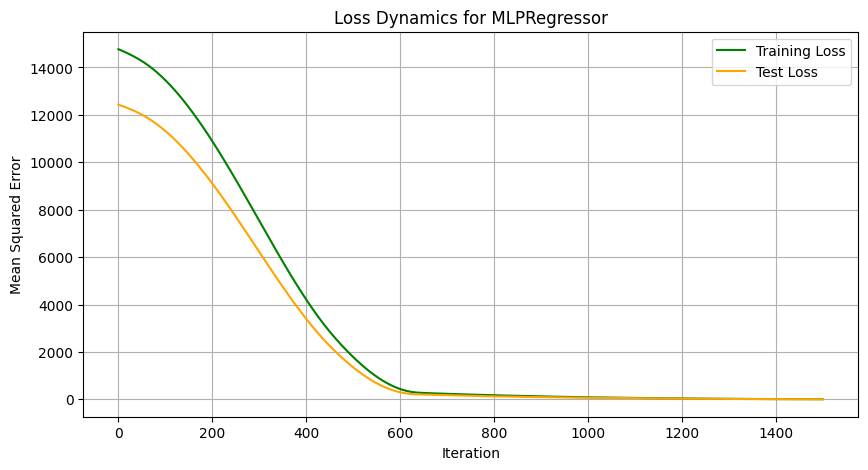

In [7]:
# Visualization: Loss Dynamics (Training and Test)
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', color='green')
plt.plot(test_losses, label='Test Loss', color='orange')
plt.title('Loss Dynamics for MLPRegressor')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()